In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

import keras
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,concatenate,Dropout
from keras.models import Model
from keras.optimizers import RMSprop
from keras import backend as K

## import  train images and their masks

In [3]:
PATH=os.getcwd()
df_depth=pd.read_csv(PATH+'\\data\\depths.csv')
# df_depth_aug=pd.read_csv(PATH+'\\data\\depths_aug.csv')
# df_depth=pd.concat([df_depth,df_depth_aug],axis=0)

df_depth['id']=df_depth['id']+'.png'


In [52]:


## import [training +mask] data and [testing data]
list_depths=[]
avg_int_imgs=[]
train_imgs = []
avg_int_masks=[]
train_masks = []
for img_path in glob(PATH+"\\data\\train\\images\\*"):#+glob(PATH+"\\data\\train\\aug_images\\*")
    
    n= cv2.imread(img_path)
    if np.average(n)!=0:
        n=np.array(n)
        n=cv2.resize(n,(128,128),interpolation = cv2.INTER_CUBIC)
        n = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        train_imgs.append(n)
        avg_int_imgs.append(np.average(n))
        
        
        mask_path=img_path.replace('images', 'masks')

        n_mask= cv2.imread(mask_path)
        n_mask=np.array(n_mask)
        n_mask=cv2.resize(n_mask,(128,128),interpolation = cv2.INTER_CUBIC)
        n_mask= cv2.cvtColor(n_mask,cv2.COLOR_BGR2GRAY)
        train_masks.append(n_mask)
        avg_int_masks.append(np.average(n_mask))
        list_depths.append(df_depth[df_depth["id"]==os.path.basename(os.path.normpath(img_path))]['z'].values[0])
        
# list_depths_aug=[]
# # avg_int_imgs_aug=[]
# train_imgs_aug = []
# # avg_int_masks_aug=[]
# train_masks_aug = []

# for img_path in glob(PATH+"\\data\\train\\aug_images\\*"):#+glob(PATH+"\\data\\train\\aug_images\\*")
    
#     n= cv2.imread(img_path)
#     if np.average(n)!=0:
#         n=np.array(n)
#         n=cv2.resize(n,(128,128),interpolation = cv2.INTER_CUBIC)
#         n = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
#         train_imgs_aug.append(n)
# #         avg_int_imgs.append(np.average(n))
        
        
#         mask_path=img_path.replace('images', 'masks')

#         n_mask= cv2.imread(mask_path)
#         n_mask=np.array(n_mask)
#         n_mask=cv2.resize(n_mask,(128,128),interpolation = cv2.INTER_CUBIC)
#         n_mask= cv2.cvtColor(n_mask,cv2.COLOR_BGR2GRAY)
#         train_masks_aug.append(n_mask)
# #         avg_int_masks.append(np.average(n_mask))
#         list_depths_aug.append(df_depth[df_depth["id"]==os.path.basename(os.path.normpath(img_path))]['z'].values[0])
    
# len(list_depths_aug),len(list_depths)

In [61]:
# for i in range(20):
#     plt.figure()
#     plt.imshow(np.concatenate((train_imgs[i], train_masks[i]), axis=1),cmap='gray')
from math import ceil
[ceil(x.flatten().sum()/(128.0*128.0*255.)) for x in train_masks]


[0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


## train test split

In [67]:
# train test split
df_train=pd.DataFrame()
df_train["imgs"]=train_imgs
df_train["depths"]=list_depths#[[[x]*128]*128 for x in list_depths]



from sklearn.model_selection import train_test_split
df_X_train, df_X_test, y_train, y_test= train_test_split(df_train, train_masks, test_size=0.2, random_state=1234,
                                                          stratify=[ceil(x.flatten().sum()/(128.0*128.0*255.)) for x in train_masks])

## Prepare and Add augmentated data to training sample

# df_X_train_aug=pd.DataFrame(columns=['imgs','depths'])
# df_X_train_aug['imgs']=train_imgs_aug
# df_X_train_aug['depths']=list_depths_aug

# df_X_train=pd.concat([df_X_train,df_X_train_aug],axis=0)
# y_train=y_train+train_masks_aug


#normalize data
X_train=np.array(df_X_train['imgs'].values.tolist())
X_test=np.array(df_X_test['imgs'].values.tolist())
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 128, 128, 1))    # adapt this if using 'channels_first' image data format
X_test = np.reshape(X_test, (len(X_test), 128, 128, 1))


y_train=np.array(y_train)#.astype('float32')/ 255
y_test=np.array(y_test)#.astype('float32')#/ 255
y_train = y_train.astype('float32') / 255
y_test = y_test.astype('float32') / 255
y_train = np.reshape(y_train, (len(y_train), 128, 128, 1))    # adapt this if using 'channels_first' image data format
y_test = np.reshape(y_test, (len(y_test), 128, 128, 1))

df_X_train.shape,df_X_test.shape,len(y_train),len(y_train[0])
# y_train


((3136, 2), (784, 2), 3136, 128)

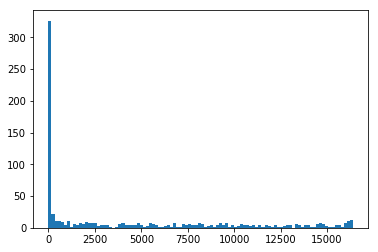

In [70]:

plt.hist([x.flatten().sum() for x in y_test],bins=100)
plt.show()

In [23]:
# df_X_train.sort_values("depths")
df_aug=df_X_train.copy()
df_aug["masks"]=y_train
df_aug=df_aug.sort_values('depths')
df_aug["bin_count"]=list(np.digitize(df_aug['depths'].values, range(0,1000,100)))


# pd.qcut(df_aug['depths'].values,bins=range(0,1000,100))
a=list(np.digitize(df_aug['depths'].values, range(0,1000,100)))
list_bin_count=[a.count(i) for i in range(1,11)]
list_bin_count_aug=[max(list_bin_count)-i for i in list_bin_count]
list_bin_count_aug

methods=["horizontal_flip","vertical_flip","blur", "noise", "dropout"]

from random import choices
# df_new_aug_data=pd.DataFrame()
list_id_depth=[]

for i in range(0,10):
    sub_df=df_aug.loc[df_aug['bin_count']==i+1]
    list_sub_index=choices(list(sub_df.index), k=list_bin_count_aug[i])
    
#     for count,idx in enumerate(list_sub_index):
#         img=sub_df.loc[idx,"imgs"]#.values
#         mask=sub_df.loc[idx,"masks"]#.values
#         depth=sub_df.loc[idx,"depths"]
        
#         random_array_img=np.random.choice([0, 1], size=(len(methods),), p=[2./5, 3./5])
#         random_array_mask=list(random_array_img[0:2])+[0,0,0]
        
#         aug_img=get_augmented_image(img,methods,random_array_img)
#         aug_mask= get_augmented_image(mask,methods,random_array_mask)
        
# #         plt.figure()
# #         combined_img=np.concatenate((aug_img, aug_mask), axis=1)
# #         plt.imshow(combined_img,cmap='gray')
# #         print("aug_"+str(idx)+'_'+str(count))

#         list_id_depth.append(["aug_"+str(idx)+'_'+str(count),depth])
#         cv2.imwrite(PATH + "\\data\\train\\aug_images\\"+"aug_"+str(idx)+'_'+str(count)+".png",aug_img)
#         cv2.imwrite(PATH + "\\data\\train\\aug_masks\\"+"aug_"+str(idx)+'_'+str(count)+".png",aug_mask)
        
        
        
    

In [31]:
df_depths_aug=pd.DataFrame(list_id_depth,columns=['id','z'])
df_depths_aug.to_csv(PATH+"\\data\\depths_aug.csv",index=False)

(array([ 40.,  48.,  69., 166., 188.,  27.,  24.,  17.,  43.,  34.,  31.,
         43.,  24.,  29.,  29.,  48.,  26.,  22.,  26.,  19.,  17.,  21.,
         22.,  32.,  24.,  20.,  29.,   6.,  17.,   7.,  12.,  14.,  10.,
          9.,  10.,  14.,   7.,  10.,   4.,   4.,   3.,   6.,   5.,   6.,
          6.,   5.,   4.,   8.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   2.,   1.,   0.,   5.,   3.,
          6.,   1.,   2.,   3.,   7.,  17.,  18.,  15.,  11.,  15.,  18.,
         13.,  12.,  16.,  12.,  14.,  32.,  45.,  44.,  44.,  45.,  58.,
         11.,  10.,  16.,  27.,   1.,  10.,  65.,  80.,  56.,  65., 155.,
         65.]),
 array([ 54.  ,  63.05,  72.1 ,  81.15,  90.2 ,  99.25, 108.3 , 117.35,
        126.4 , 135.45, 144.5 , 153.55, 162.6 , 171.65, 180.7 , 189.75,
        198.8 , 207.85, 216.9 , 225.95, 235.  , 244.05, 253.1 , 262.15,
        271.2 , 280.25, 289.3 , 298.35, 307.4 , 316.45, 325.5 , 334.55,
        343.6 , 352.65, 361.7 

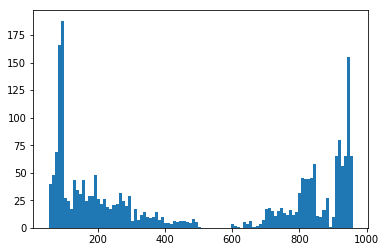

In [32]:
plt.hist(df_depths_aug['z'].values,bins=100)

In [105]:
methods=["horizontal_flip","vertical_flip","blur", "noise", "dropout"]
random_array_img=np.random.choice([0, 1], size=(len(methods),), p=[2./5, 3./5])
random_array_mask=list(random_array_img[0:2])+[0,0,0]
random_array_img,random_array_mask

(array([1, 1, 0, 1, 0]), [1, 1, 0, 0, 0])

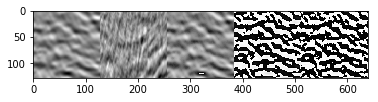

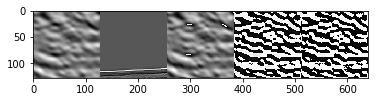

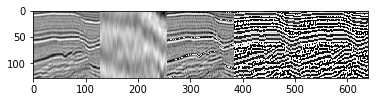

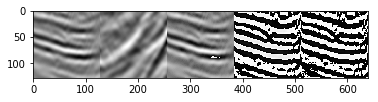

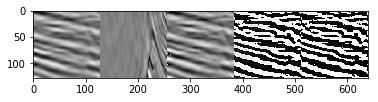

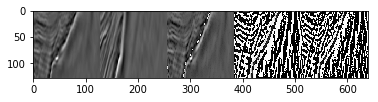

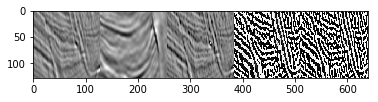

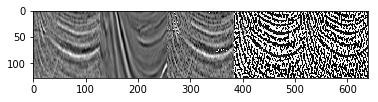

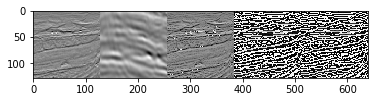

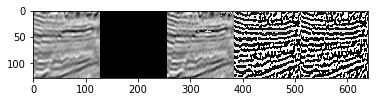

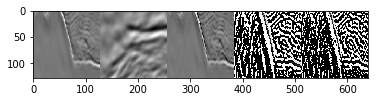

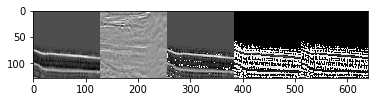

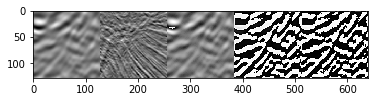

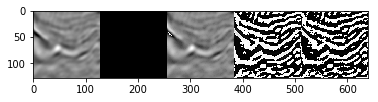

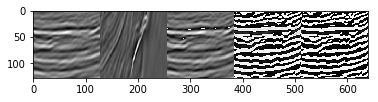

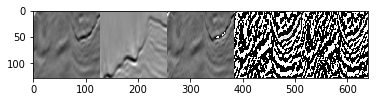

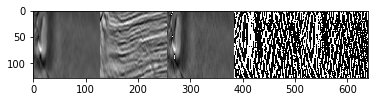

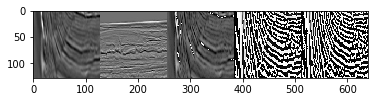

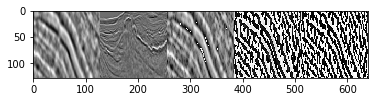

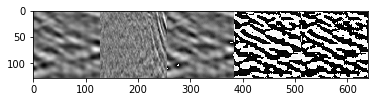

In [10]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
kernel1=np.ones((7,7),np.float32)/49
kernel2 =np.ones((5,5),np.float32)/25


# print(dst.shape)

for i in range(20):
    dst = cv2.filter2D(train_imgs[i],-1,kernel)
    dst1 = cv2.filter2D(train_imgs[i],-1,kernel1)
    dst2 = cv2.filter2D(train_imgs[i],-1,kernel2)
    plt.figure()
    plt.imshow(np.concatenate((train_imgs[i], train_masks[i],train_imgs[i]-dst,train_imgs[i]-dst1,train_imgs[i]-dst2), axis=1),cmap='gray')

In [11]:

for i in range(len(train_imgs)):
    if np.average(train_imgs[i])<10:
    
        plt.figure()
        plt.imshow(np.concatenate((train_imgs[i], train_masks[i]), axis=1),cmap='gray')

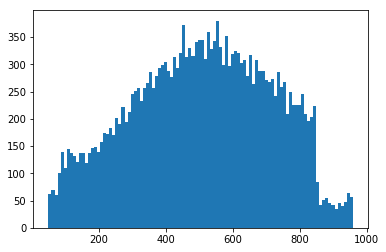

2

In [14]:
depth=pd.read_csv(PATH+"//data//depths.csv")
plt.hist(depth["z"], bins=100)

plt.show()




## Data Augmentation

In [15]:


# random_array=np.random.choice([0, 1], size=(len(methods),), p=[1./5, 4./5])
def get_augmented_image(img,methods,random_array):
    
#     Available_methods=["horizontal_flip","vertical_flip","blur","contrast","HSV",
#                         "geometric_transformations","convert_to_gray_scale_3d", "noise", "dropout"]

    
#     random_array_gray=np.random.choice([0, 1], size=(1,), p=[19./20, 1./20])
#     random_array=np.concatenate([random_array, random_array_gray])

    for i in range(len(methods)):
        if random_array[i]==1:
            method=methods[i]
#             print(method)

            if method=="horizontal_flip":
                img=cv2.flip(img,1)

            if method=="vertical_flip":
                img=cv2.flip(img,0)

            if method=="blur":
                img=add_random_blur_image(img)

            if method=="convert_to_gray_scale_3d":
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

            if method=="contrast":
                imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                imghsv[:,:,2] = [[max(pixel - 25, 0) if pixel < 190 else min(pixel + 25, 255) for pixel in row] for row in imghsv[:,:,2]]
                img=cv2.cvtColor(imghsv, cv2.COLOR_HSV2BGR)

            if method=="HSV":
                img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                
            if method=="noise":
                img=add_noise_to_image(img)
                
            if method=="dropout":
                img=add_dropout_to_image(img)

    return img


def add_random_blur_image(img):
    blur_methods=["average_blur","median_blur","gaussian_blur","bilateral_blur"]
    random_index=random.randint(0,len(blur_methods)-1)
    
    method=blur_methods[random_index]
    
    if method=="average_blur":
        img = cv2.blur(img,(3,3))
        
    if method=="median_blur":
        img=cv2.medianBlur(img,3)
        
    if method=="gaussian_blur":
        img=cv2.GaussianBlur(img,(3,3),0)
        
    if method=="bilateral_blur":
        img=cv2.bilateralFilter(img,9,75,75)
    
    return img


def add_noise_to_image(img):
    noised_img = img+2*img.std()*np.random.random(img.shape)
    
    return noised_img
    
def add_dropout_to_image(img):
    dropout_img = img-2*img.std()*np.random.random(img.shape)
    
    return dropout_img
    
        


In [11]:

random_array_img=[0,2]
random_array_img[0:2]

[0, 2]

In [33]:
mean = 0.0   # some constant
std = 1.0    # some constant (standard deviation)
noisy_img = img + np.random.normal(mean, std, img.shape)
noisy_img_clipped = np.clip(noisy_img, 0, 255)  # we might get out of bounds due to noise

In [37]:




input_img = Input(shape=(128,128, 1))    # adapt this if using 'channels_first' image data format
depth_input_16 = Input(shape=(16,16, 1), name='depth_input_16')
depth_input_32 = Input(shape=(32,32, 1), name='depth_input_32')
depth_input_64 = Input(shape=(64,64, 1), name='depth_input_64')
depth_input_128 = Input(shape=(128,128, 1), name='depth_input_128')


conv1_1= Conv2D(8, 3, activation='relu', padding='same')(input_img)
conv1_2= Conv2D(8, 3, activation='relu', padding='same')(conv1_1)
pool_1 = MaxPooling2D((2, 2), padding='same')(conv1_2)
pool_1=Dropout(0.2)(pool_1)

conv2_1= Conv2D(16, 3, activation='relu', padding='same')(pool_1)
conv2_2= Conv2D(16, 3, activation='relu', padding='same')(conv2_1)
pool_2= MaxPooling2D((2, 2), padding='same')(conv2_2)
pool_2=Dropout(0.2)(pool_2)

conv3_1= Conv2D(32, 3, activation='relu', padding='same')(pool_2)
conv3_2= Conv2D(32, 3, activation='relu', padding='same')(conv3_1)
pool_3= MaxPooling2D((2, 2), padding='same')(conv3_2)
pool_3=Dropout(0.2)(pool_3)


conv4_1= Conv2D(32, 3, activation='relu', padding='same')(pool_3)
conv4_2= Conv2D(32, 3, activation='relu', padding='same')(conv4_1)
encoded = MaxPooling2D((2, 2), padding='same')(conv4_2)



# at this point the representation is (4, 4, 8), i.e. 128-dimensional

up4_1 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same') (encoded)
merge_4=concatenate([up4_1, conv4_2,depth_input_16])
merge_4=Dropout(0.2)(merge_4)
up4_2 = Conv2D(32, 3, activation='relu', padding='same')(merge_4)
up4_3 = Conv2D(32, 3, activation='relu', padding='same')(up4_2)


up3_1 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same') (up4_3)
merge_3=concatenate([up3_1, conv3_2,depth_input_32])
merge_3=Dropout(0.2)(merge_3)
up3_2 = Conv2D(32, 3, activation='relu', padding='same')(merge_3)
up3_3 = Conv2D(32, 3, activation='relu', padding='same')(up3_2)


up2_1 = Conv2DTranspose(16, 2, strides=(2, 2), padding='same') (up3_3)
merge_2=concatenate([up2_1, conv2_2,depth_input_64])
merge_2=Dropout(0.2)(merge_2)
up2_2 = Conv2D(16, 3, activation='relu', padding='same')(merge_2)
up2_2 = Conv2D(16, 3, activation='relu', padding='same')(up2_2)



up1_1 = Conv2DTranspose(8, 2, strides=(2, 2), padding='same')(up2_2)
merge_1=concatenate([up1_1, conv1_2,depth_input_128])
merge_1=Dropout(0.2)(merge_1)
up1_2 = Conv2D(8, 3, activation='relu', padding='same')(merge_1)
up1_3 = Conv2D(8, 3, activation='relu', padding='same')(up1_2)


up0_0 = Conv2D(8, 2, activation='relu', padding='same')(up1_3)
up0_1 = Conv2D(1, 1, activation="sigmoid", padding='same')(up0_0)


autoencoder = Model(inputs=[input_img, depth_input_16,depth_input_32,depth_input_64,depth_input_128], outputs=[up0_1])

autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 128, 128, 8)  80          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 128, 128, 8)  584         conv2d_55[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 64, 64, 8)    0           conv2d_56[0][0]                  
__________________________________________________________________________________________________
dropout_20

In [ ]:
input_img = Input(shape=(128,128, 1))    # adapt this if using 'channels_first' image data format

conv1_1= Conv2D(8, 3, activation='relu', padding='same')(input_img)
conv1_2= Conv2D(8, 3, activation='relu', padding='same')(conv1_1)
pool_1 = MaxPooling2D((2, 2), padding='same')(conv1_2)
pool_1=Dropout(0.2)(pool_1)

conv2_1= Conv2D(16, 3, activation='relu', padding='same')(pool_1)
conv2_2= Conv2D(16, 3, activation='relu', padding='same')(conv2_1)
pool_2= MaxPooling2D((2, 2), padding='same')(conv2_2)
pool_2=Dropout(0.2)(pool_2)

conv3_1= Conv2D(32, 3, activation='relu', padding='same')(pool_2)
conv3_2= Conv2D(32, 3, activation='relu', padding='same')(conv3_1)
pool_3= MaxPooling2D((2, 2), padding='same')(conv3_2)
pool_3=Dropout(0.2)(pool_3)


conv4_1= Conv2D(32, 3, activation='relu', padding='same')(pool_3)
conv4_2= Conv2D(32, 3, activation='relu', padding='same')(conv4_1)
encoded = MaxPooling2D((2, 2), padding='same')(conv4_2)



# at this point the representation is (4, 4, 8), i.e. 128-dimensional

up4_1 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same') (encoded)
depth_input_16 = Input(shape=(16,16, 1), name='depth_input_16')
merge_4=concatenate([up4_1, conv4_2,depth_input_16])
up4_2 = Conv2D(32, 3, activation='relu', padding='same')(merge_4)
up4_3 = Conv2D(32, 3, activation='relu', padding='same')(up4_2)

up3_1 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same') (up4_3)
merge_3=concatenate([up3_1, conv3_2])
merge_3=Dropout(0.2)(merge_3)
up3_2 = Conv2D(32, 3, activation='relu', padding='same')(merge_3)
up3_3 = Conv2D(32, 3, activation='relu', padding='same')(up3_2)


up2_1 = Conv2DTranspose(16, 2, strides=(2, 2), padding='same') (up3_3)
merge_2=concatenate([up2_1, conv2_2])
merge_2=Dropout(0.2)(merge_2)
up2_2 = Conv2D(16, 3, activation='relu', padding='same')(merge_2)
up2_2 = Conv2D(16, 3, activation='relu', padding='same')(up2_2)



up1_1 = Conv2DTranspose(8, 2, strides=(2, 2), padding='same')(up2_2)
merge_1=concatenate([up1_1, conv1_2])
merge_1=Dropout(0.2)(merge_1)
up1_2 = Conv2D(8, 3, activation='relu', padding='same')(merge_1)
up1_3 = Conv2D(8, 3, activation='relu', padding='same')(up1_2)


up0_0 = Conv2D(8, 2, activation='relu', padding='same')(up1_3)
up0_1 = Conv2D(1, 1, activation="sigmoid", padding='same')(up0_0)


autoencoder = Model(inputs=[input_img, depth_input_16], outputs=[up0_1])

autoencoder.summary()